## Approach of the problem


* import necessary libraries and Dataset
* Declare the model
    * Sequential : Sequence of layers
    * Functional : Multi modal / Transfer learning
* Declare the layer
    * Dense
    * Dropout
    * Number of neurons
    * Activation function
* Compile the model
    * Optimizer (SGD , ADAM)
    * Loss Function(Cross Entropy,MSE,RMSE)
    * Metrics (Accuracy , F1 , Precision,Recall)
* Fit the model
    * Pass X Train and Y Train
    * pass X Test and Y Test
    * Epochs
    * Batch size
* Predict and Evaluate the model


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam

In [9]:
!unzip '/content/Fashion MNIST.zip'

Archive:  /content/Fashion MNIST.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [10]:
train=pd.read_csv('/content/fashion-mnist_train.csv')
test=pd.read_csv('/content/fashion-mnist_test.csv')

In [44]:
train[train['label'] == 6]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
40,6,0,0,0,0,0,0,0,0,0,...,41,0,0,0,0,0,0,0,0,0
43,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,138,154,78,0,0,0
62,6,0,0,0,0,0,0,0,0,1,...,81,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59949,6,0,0,0,0,0,0,0,0,0,...,34,18,0,0,0,0,0,0,0,0
59950,6,0,0,0,0,0,0,0,0,17,...,156,103,29,0,0,0,0,0,0,0
59978,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
59985,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(train['label'].min())
print(train['label'].max())

0
9


In [14]:
x = train.drop('label' , axis = 1)
y = train['label']

In [15]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


## Model Evaluation

In [18]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

## Encoding

In [19]:
y_train_oe = to_categorical(y_train)
y_test_oe = to_categorical(y_test)

In [20]:
y_train_oe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Declare the models and layers

In [21]:
model = Sequential()
model.add(Dense(256 , activation = 'relu' , input_shape = (784,))) # Layer 1 and Input Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 2
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 3
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(10 , activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

In [23]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

## Fit the model

In [26]:
hist = model.fit(x_train , y_train_oe , batch_size = 128 , epochs = 100 , validation_data = (x_test , y_test_oe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5588 - loss: 9.3539 - val_accuracy: 0.7368 - val_loss: 0.7826
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7046 - loss: 0.8686 - val_accuracy: 0.7761 - val_loss: 0.6140
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7421 - loss: 0.7011 - val_accuracy: 0.7900 - val_loss: 0.5576
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7637 - loss: 0.6313 - val_accuracy: 0.7969 - val_loss: 0.5217
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7766 - loss: 0.5903 - val_accuracy: 0.8050 - val_loss: 0.4991
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7777 - loss: 0.5757 - val_accuracy: 0.8185 - val_loss: 0.4814
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7888 - loss: 0.5462 - val_accuracy: 0.8145 - val_loss: 0.4820
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7983 - loss: 0.530

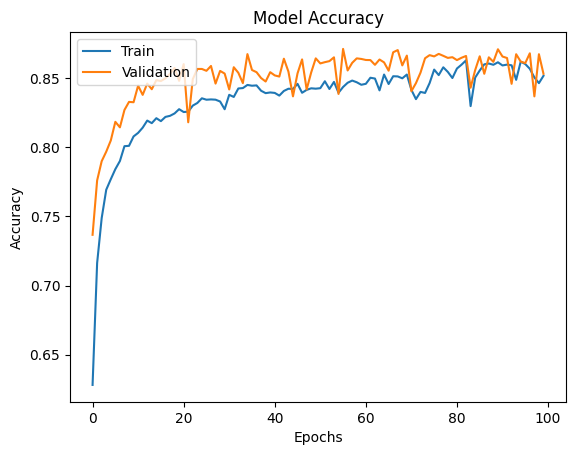

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

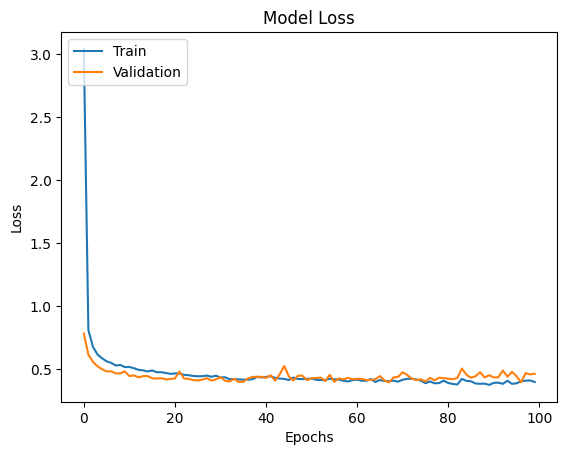

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

Model Evaluation

In [28]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
model_eval(y_train , y_hat_train_dense)

The Accuracy of the Model is: 0.88
[[3884    0   39  147   29    1  651    0   17    0]
 [   2 4720    0   85    4    0   13    0    2    0]
 [  11    0 2955   47 1624    0  154    0    9    0]
 [  44    2   10 4413  221    0   65    0    3    0]
 [   1    2  116  117 4493    0   84    0    2    0]
 [   0    0    0    0    1 4805    0   49    0    4]
 [ 549    0  265  107 1138    0 2677    0   21    0]
 [   0    0    0    0    0    2    0 4720    0   54]
 [   4    1    8   12   20    1   28    6 4771    0]
 [   0    0    0    0    1    2    0  126    0 4661]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4768
           1       1.00      0.98      0.99      4826
           2       0.87      0.62      0.72      4800
           3       0.90      0.93      0.91      4758
           4       0.60      0.93      0.73      4815
           5       1.00      0.99      0.99      4859
           6       0.73      0.56      0.64      4757
 

In [30]:
model_eval(y_test , y_hat_test_dense)

The Accuracy of the Model is: 0.85
[[ 994    0    7   44    9    0  171    2    5    0]
 [   0 1126    1   37    7    0    3    0    0    0]
 [   6    0  715   10  428    0   32    0    9    0]
 [  15    6    4 1119   78    0   19    0    1    0]
 [   2    1   27   48 1071    0   33    0    3    0]
 [   0    0    0    0    0 1085    0   38    4   14]
 [ 155    1   78   38  302    0  653    1   15    0]
 [   0    0    0    0    0   13    0 1194    2   15]
 [   2    1    3    0    5    0   13    4 1121    0]
 [   0    0    0    0    0   10    1   37    1 1161]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1232
           1       0.99      0.96      0.98      1174
           2       0.86      0.60      0.70      1200
           3       0.86      0.90      0.88      1242
           4       0.56      0.90      0.69      1185
           5       0.98      0.95      0.96      1141
           6       0.71      0.53      0.60      1243
 

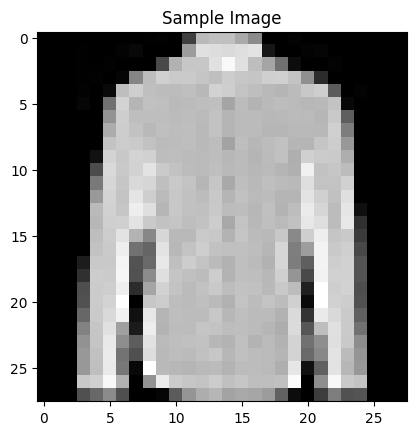

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label: 6


In [38]:
# Choose a random image from the test set
index = np.random.randint(0, len(x_test))
image = x_test.iloc[index].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Sample Image')
plt.show()

# Predict the label for the image
prediction = model.predict(x_test.iloc[index].values.reshape(1, 784))
predicted_label = np.argmax(prediction)

print('Predicted Label:', predicted_label)
